##Create the Decision Tree classifier and visualize it graphically for the iris dataset.

###Author: **Venkat Siddish Gudla**


Problem Statement : From the given ‘Iris’ dataset, create the decision tree classifier and represent it visually. Link for the raw dataset: https://bit.ly/3kXTdox

In [ ]:
#importingg the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
#reading the dataset

raw_data = pd.read_csv('/content/drive/MyDrive/FINANCIAL ANALYSIS/Iris.csv')
raw_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#checking any missing data

raw_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
raw_data = raw_data.copy()

In [ ]:
print('No. of observations: {}\n No. of variables: {}'.format(raw_data.shape[0],raw_data.shape[1]-2))

No. of observations: 150
 No. of variables: 4


In [ ]:
#replacing the id with index
raw_data = raw_data.set_index('Id')

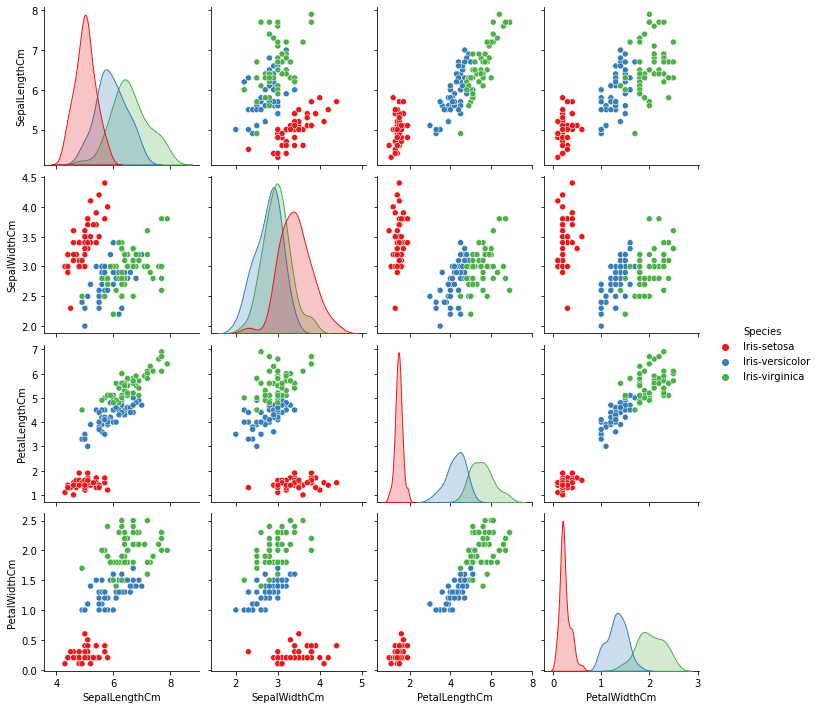

In [ ]:
sns.pairplot(raw_data, hue='Species', palette = 'Set1');
#visualization of the data set 

Pairplots can be very useful to understand all possible relationships between all the features in our dataset. From this above pairplot, we can see that the clusters of Species 'versicolor' and 'virginica' are closely related, whereas 'sertosa' is more distinct.

#Shuffling the data

In [ ]:
raw_data = raw_data.sample(frac = 1)

In [ ]:
#encoding the target data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encode = LabelEncoder()
raw_data['Encoded Species']  = label_encode.fit_transform(raw_data['Species'])

In [ ]:
raw_data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded Species
Id,,,,,,
67,5.6,3.0,4.5,1.5,Iris-versicolor,1
141,6.7,3.1,5.6,2.4,Iris-virginica,2
15,5.8,4.0,1.2,0.2,Iris-setosa,0
20,5.1,3.8,1.5,0.3,Iris-setosa,0
42,4.5,2.3,1.3,0.3,Iris-setosa,0
25,4.8,3.4,1.9,0.2,Iris-setosa,0
1,5.1,3.5,1.4,0.2,Iris-setosa,0
30,4.7,3.2,1.6,0.2,Iris-setosa,0
146,6.7,3.0,5.2,2.3,Iris-virginica,2


From the above dataframe we can see that the species are encoded as:

*   **Iris-virginica	= 2**

*   **Iris-versicolor	= 1**

*   **Iris-setosa	= 0**




In [ ]:
enc_data = label_encode.fit_transform(raw_data['Species'])
enc_data

array([1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0,
       2, 0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0,
       1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 1, 0, 2, 2,
       0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 0,
       2, 0, 1, 1, 0, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 2, 0, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 2, 2])

##Building a Decision Tree model



In [ ]:
from sklearn.model_selection import train_test_split

x = raw_data.iloc[:, :-2].values
x

array([[5.6, 3. , 4.5, 1.5],
       [6.7, 3.1, 5.6, 2.4],
       [5.8, 4. , 1.2, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [4.8, 3.4, 1.9, 0.2],
       [5.1, 3.5, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.7, 3. , 5.2, 2.3],
       [6.2, 2.9, 4.3, 1.3],
       [6.4, 3.2, 4.5, 1.5],
       [6.8, 3. , 5.5, 2.1],
       [6.4, 3.2, 5.3, 2.3],
       [6.9, 3.2, 5.7, 2.3],
       [6.5, 3. , 5.5, 1.8],
       [6.5, 3. , 5.2, 2. ],
       [5.4, 3. , 4.5, 1.5],
       [6.1, 3. , 4.6, 1.4],
       [7.9, 3.8, 6.4, 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 4.4, 1.5, 0.4],
       [5.8, 2.7, 5.1, 1.9],
       [5.4, 3.4, 1.7, 0.2],
       [6.2, 3.4, 5.4, 2.3],
       [6.3, 2.5, 4.9, 1.5],
       [5. , 3.3, 1.4, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.8, 2.7, 3.9, 1.2],
       [5.6, 2.9, 3.6, 1.3],
       [5.9, 3.2, 4.8, 1.8],
       [5.8, 2.8, 5.1, 2.4],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, enc_data, test_size = 0.3, random_state= 101)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_predictions = dtree.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score
print ('Accuracy of this decision tree model = ', accuracy_score(y_test,y_predictions)*100)

Accuracy of this decision tree model =  93.33333333333333


Note: We can increase the prediction accuracy score by several methods like changing the split of data or changing the no. of levels of the model tree.

In [ ]:
#Comparing the predicted value and the actual value
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_predictions})
df_compare.head()

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


##Testing out model using Random test case

In [ ]:
#predicting the species on a random new data

# prediction output should give Iris-sesota
flower = [['5','3','2','0.5']]                        # Sepallength=5, Sepalwidth=3 ,PetalLength=2 , PetalWidth=0.5
new_pred = dtree.predict(flower)
print("Predicted species of flower = ",(new_pred[0]))

Predicted species of flower =  0


**Label 0 is Iris-sesota**

##Visualizing the Decision Tree

In [ ]:
features = list(raw_data.columns[:-2])
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [ ]:
target = list(raw_data.Species.unique())
target

['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']

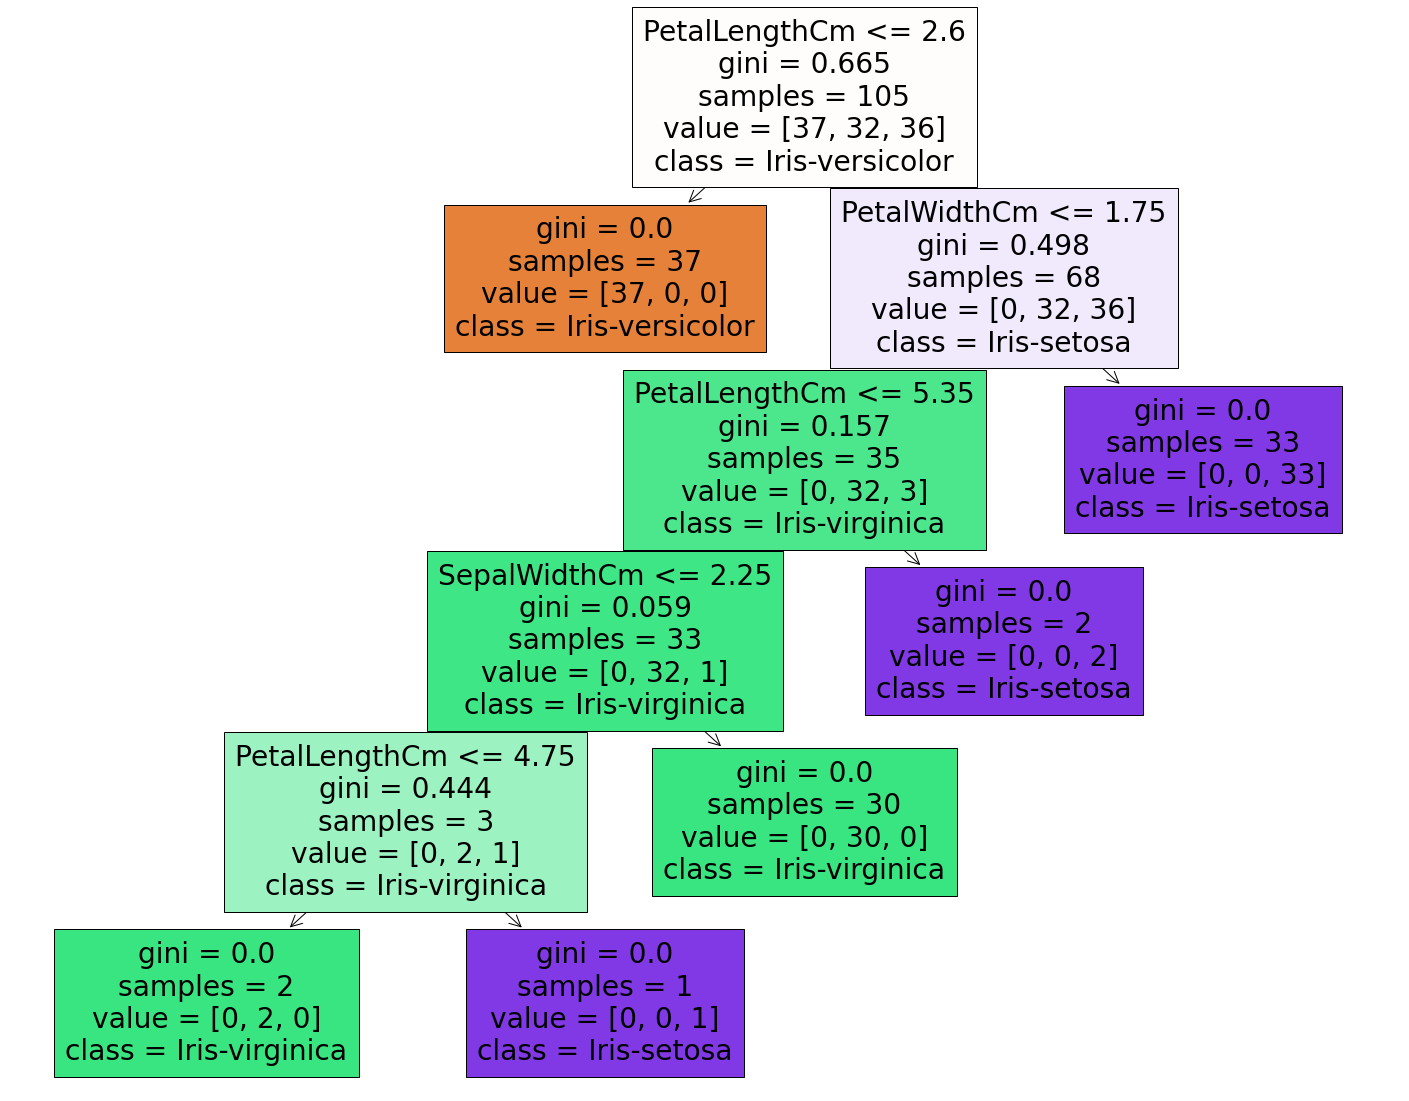

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names= features, 
                   class_names= target, 
                   filled= True)